In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime, date
from sklearn.preprocessing import MinMaxScaler

In [2]:
n_rows = 1000
np.random.seed(42)
df = {
    'id':range(0,n_rows),
    'serasaScore':np.random.normal(500,400,size=n_rows),
    'incomeSource':np.random.randint(1,5,size=n_rows),
}

df = pd.DataFrame(df)
df.head(2)

,id,serasaScore,incomeSource
0,0,698.685661,3
1,1,444.694280,4


# SerasaScore

In [3]:
scaler = MinMaxScaler()
df['serasaScore'] = scaler.fit_transform(df['serasaScore'].values.reshape(-1,1))*1000
df['serasaScore'] = df['serasaScore'].astype(int)
df.serasaScore.hist()

# # Restrições

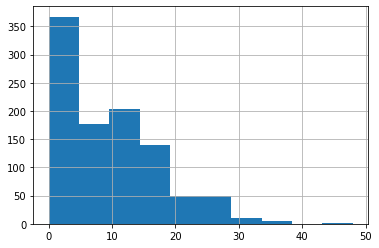

In [4]:
np.random.seed(42)
df['n_restrictions']  = np.random.normal(10,10,size=n_rows)
df['n_restrictions'] = df['n_restrictions'].astype(int)
df['n_restrictions']  = df.apply(lambda row: 0 if row['n_restrictions'] < 0 else row['n_restrictions'],axis=1)
df['n_restrictions']  = df.apply(lambda row: 
                                 0 if (row['serasaScore']/1000)*np.random.random() > 0.5 
                                 else row['n_restrictions'],
                                 axis=1)
df['n_restrictions'].hist()

# Age

In [5]:
np.random.seed(42)
df['birthDate'] = [
    date(
        np.random.randint(1940, 2010),
        np.random.randint(1, 12),
        np.random.randint(1, 28)
    )
    for _ in range(0, n_rows)
]
df['birthDate'].sample(10)

179    2000-09-19
957    1943-06-14
836    1946-07-12
799    2003-01-24
911    1971-08-11
642    1962-04-16
991    1962-11-27
373    1977-02-07
847    1947-10-26
874    2002-03-22
Name: birthDate, dtype: object

# Income

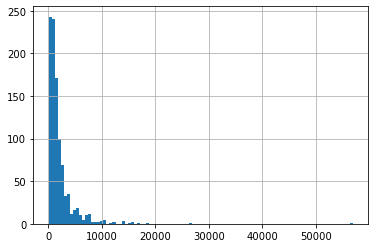

In [6]:
np.random.seed(42)
df['income'] = np.random.lognormal(0.7,1,size=n_rows)*600
df['income'].hist(bins=100)

# output

In [7]:
df.to_excel('SerasaScore.xlsx')

In [8]:
df.sample(10)

,id,serasaScore,incomeSource,n_restrictions,birthDate,income
541,541,297,1,0,1952-09-07,390.419890
466,466,543,3,16,1943-06-25,2232.989066
181,181,336,4,1,1991-03-26,512.741643
332,332,467,2,10,1953-03-06,1303.403519
40,40,561,1,17,1944-10-23,2528.537206
890,890,572,1,18,1990-05-19,2744.658221
80,80,425,2,7,1999-01-02,969.962846
198,198,465,2,10,2009-03-12,1280.669637
505,505,388,1,5,1977-08-27,742.337708
586,586,392,3,5,1946-11-20,763.237120
